Assignment Objective

This assignment consists of two parts:

1. **Predict house prices using Supervised Learning (Regression).**
2. **Cluster customers based on purchase behaviour using Unsupervised Learning (Clustering).**

In Part 1, we use Linear Regression on a Housing dataset.  
In Part 2, we use K-Means Clustering on a Customer Purchase Behaviour dataset.

1.**Predict house prices using Supervised Learning (Regression).**

In [62]:
#PART 1
#Load dataset
import pandas as pd
df = pd.read_csv("housing.csv")
print(df.head())
print(df.info())
print(df.shape)

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [25]:
#Check for missing values
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [27]:
#convert categorical data to numbers
#(A) Convert yes/no → 1/0
df = df.replace({'yes': 1, 'no': 0})

C:\Users\91939\AppData\Local\Temp\ipykernel_26020\744343570.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'yes': 1, 'no': 0})


In [28]:
#Encode furnishingstatus
df['furnishingstatus'] = df['furnishingstatus'].map({
    'unfurnished': 0,
    'semi-furnished': 1,
    'furnished': 2
})

In [29]:
print(df.dtypes)

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object


In [31]:
#Separate features (X) and target (y)
X = df.drop("price", axis=1)   # Features
y = df["price"]                # Target
print(X.shape, y.shape)

(545, 12) (545,)


In [32]:
#Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(X_train.shape, X_test.shape)

(436, 12) (109, 12)


In [36]:
#Train Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [37]:
y_pred = model.predict(X_test)


In [38]:
#Evaluate the model
from sklearn.metrics import r2_score, mean_squared_error
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.6494754192267804
MSE: 1771751116594.0344


In [39]:
#Compare actual vs predicted
results = pd.DataFrame({
    "Actual Price": y_test,
    "Predicted Price": y_pred
})
print(results.head())

     Actual Price  Predicted Price
316       4060000     5.203692e+06
77        6650000     7.257004e+06
360       3710000     3.062829e+06
90        6440000     4.559592e+06
493       2800000     3.332932e+06


In [54]:
#Load dataset
import pandas as pd
df = pd.read_csv("customer_purchase_behavior.csv")
print(df.head())


   CustomerID  Recency  Purchase_Frequency  Monetary_Value  Avg_Order_Value
0           1      103                  14            1667             4343
1           2      349                  21           27692             3844
2           3      271                  48            1562             4632
3           4      107                  20           19040             2255
4           5       72                   8           24744             4920


In [55]:
#Select purchase behaviour features
X = df[['Recency', 'Purchase_Frequency', 'Monetary_Value', 'Avg_Order_Value']]


In [57]:
#Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

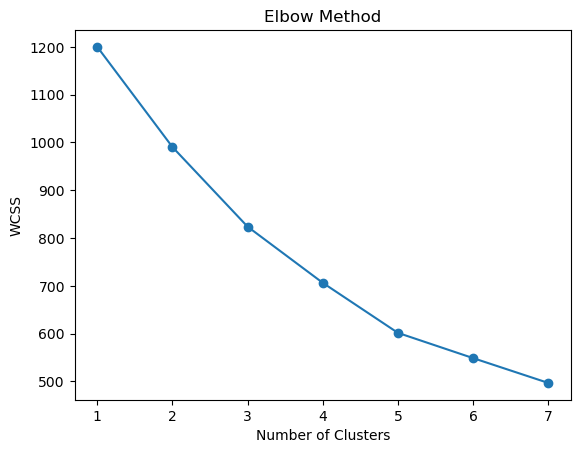

In [58]:
#Find best number of clusters
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,8), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [50]:
import warnings
warnings.filterwarnings("ignore")


In [59]:
#Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [60]:
#View clustered customers
print(df.head())

   CustomerID  Recency  Purchase_Frequency  Monetary_Value  Avg_Order_Value  \
0           1      103                  14            1667             4343   
1           2      349                  21           27692             3844   
2           3      271                  48            1562             4632   
3           4      107                  20           19040             2255   
4           5       72                   8           24744             4920   

   Cluster  
0        1  
1        0  
2        0  
3        1  
4        1  
